## analyzing time series contents:
### 01 import libraries & data
### 02 subsetting, wrangling, and cleaning time-series data
### 03 time series analysis: decomposition
### 04 testing for stationarity
### 05 stationarizing the US Construction data

# 01 import libraries & data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
#disable depracation warnings; more relevant to developers

plt.style.use('fivethirtyeight')
#styling option for how plots appear *see 6.6 lesson for links

In [2]:
#path
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [3]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index_col = False)

In [4]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,...,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,...,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,...,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,...,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,...,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000


In [5]:
df.dtypes

ID                      object
Severity                 int64
Distance(mi)           float64
City                    object
County                  object
State                   object
Timezone                object
Airport_Code            object
Weather_Timestamp       object
Temperature(F)         float64
Visibility(mi)         float64
Wind_Direction          object
Precipitation(in)      float64
Weather_Condition       object
Start_Time_no_ext       object
End_Time_no_ext         object
Zipcode_no_ext           int64
Airport_Type            object
Airport_Name            object
dist_to_weather(mi)    float64
project_time_length     object
const_total_minutes    float64
dtype: object

In [6]:
df['Start_Time_no_ext'].describe()

count                 5153650
unique                1611738
top       2021-02-16 05:41:49
freq                     1296
Name: Start_Time_no_ext, dtype: object

In [7]:
#split 'Start_Time_no_ext' to 'start_date' and 'start_time' will not need time
df[['start_date', 'start_time']] = df['Start_Time_no_ext'].str.split(' ', expand = True)

In [8]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes,start_date,start_time
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,...,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000,2021-11-12,07:59:00
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,...,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667,2021-10-12,07:17:30
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,...,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333,2021-02-10,02:46:10
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,...,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000,2020-09-24,15:58:00
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,...,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000,2021-06-08,21:35:00


In [9]:
df['start_date'].value_counts()

2021-02-16    17962
2021-10-26    16928
2021-12-17    16386
2021-09-24    15711
2021-11-19    15424
              ...  
2016-01-05        1
2016-01-07        1
2016-01-09        1
2016-01-18        1
2016-01-28        1
Name: start_date, Length: 2177, dtype: int64

# 02 subsetting, wrangling, and cleaning data

In [10]:
#create new df with only needed columns
df_ts = df[['start_date', 'Distance(mi)']]

In [11]:
from datetime import datetime

#make new column 'start_date_datetime' type datetime out of 'start_date' for time series analysis

df_ts['start_date_datetime'] = pd.to_datetime(df_ts['start_date'])
df_ts.head()

,start_date,Distance(mi),start_date_datetime
0,2021-11-12,0.433173,2021-11-12
1,2021-10-12,0.192266,2021-10-12
2,2021-02-10,0.032112,2021-02-10
3,2020-09-24,0.996057,2020-09-24
4,2021-06-08,0.747595,2021-06-08


In [12]:
df_ts.dtypes

start_date                     object
Distance(mi)                  float64
start_date_datetime    datetime64[ns]
dtype: object

I am creating quarter-year groupings to minimize the number of records (5,153,650) and will use this column as the index.

In [13]:
# make quarters for 2016
df_ts.loc[(df_ts['start_date_datetime']>='2016-01-01') & (df_ts['start_date_datetime']<'2016-04-01'), 'quarter'] = '2016-01-01'
df_ts.loc[(df_ts['start_date_datetime']>='2016-04-01') & (df_ts['start_date_datetime']<'2016-07-01'), 'quarter'] = '2016-04-01'
df_ts.loc[(df_ts['start_date_datetime']>='2016-07-01') & (df_ts['start_date_datetime']<'2016-10-01'), 'quarter'] = '2016-07-01'
df_ts.loc[(df_ts['start_date_datetime']>='2016-10-01') & (df_ts['start_date_datetime']<'2017-01-01'), 'quarter'] = '2016-10-01'

In [14]:
# make quarters for 2017
df_ts.loc[(df_ts['start_date_datetime']>='2017-01-01') & (df_ts['start_date_datetime']<'2017-04-01'), 'quarter'] = '2017-01-01'
df_ts.loc[(df_ts['start_date_datetime']>='2017-04-01') & (df_ts['start_date_datetime']<'2017-07-01'), 'quarter'] = '2017-04-01'
df_ts.loc[(df_ts['start_date_datetime']>='2017-07-01') & (df_ts['start_date_datetime']<'2017-10-01'), 'quarter'] = '2017-07-01'
df_ts.loc[(df_ts['start_date_datetime']>='2017-10-01') & (df_ts['start_date_datetime']<'2018-01-01'), 'quarter'] = '2017-10-01'

In [15]:
# make quarters for 2018
df_ts.loc[(df_ts['start_date_datetime']>='2018-01-01') & (df_ts['start_date_datetime']<'2018-04-01'), 'quarter'] = '2018-01-01'
df_ts.loc[(df_ts['start_date_datetime']>='2018-04-01') & (df_ts['start_date_datetime']<'2018-07-01'), 'quarter'] = '2018-04-01'
df_ts.loc[(df_ts['start_date_datetime']>='2018-07-01') & (df_ts['start_date_datetime']<'2018-10-01'), 'quarter'] = '2018-07-01'
df_ts.loc[(df_ts['start_date_datetime']>='2018-10-01') & (df_ts['start_date_datetime']<'2019-01-01'), 'quarter'] = '2018-10-01'

In [16]:
# make quarters for 2019
df_ts.loc[(df_ts['start_date_datetime']>='2019-01-01') & (df_ts['start_date_datetime']<'2019-04-01'), 'quarter'] = '2019-01-01'
df_ts.loc[(df_ts['start_date_datetime']>='2019-04-01') & (df_ts['start_date_datetime']<'2019-07-01'), 'quarter'] = '2019-04-01'
df_ts.loc[(df_ts['start_date_datetime']>='2019-07-01') & (df_ts['start_date_datetime']<'2019-10-01'), 'quarter'] = '2019-07-01'
df_ts.loc[(df_ts['start_date_datetime']>='2019-10-01') & (df_ts['start_date_datetime']<'2020-01-01'), 'quarter'] = '2019-10-01'

In [17]:
# make quarters for 2020
df_ts.loc[(df_ts['start_date_datetime']>='2020-01-01') & (df_ts['start_date_datetime']<'2020-04-01'), 'quarter'] = '2020-01-01'
df_ts.loc[(df_ts['start_date_datetime']>='2020-04-01') & (df_ts['start_date_datetime']<'2020-07-01'), 'quarter'] = '2020-04-01'
df_ts.loc[(df_ts['start_date_datetime']>='2020-07-01') & (df_ts['start_date_datetime']<'2020-10-01'), 'quarter'] = '2020-07-01'
df_ts.loc[(df_ts['start_date_datetime']>='2020-10-01') & (df_ts['start_date_datetime']<'2021-01-01'), 'quarter'] = '2020-10-01'

In [18]:
# make quarters for 2021
df_ts.loc[(df_ts['start_date_datetime']>='2021-01-01') & (df_ts['start_date_datetime']<'2021-04-01'), 'quarter'] = '2021-01-01'
df_ts.loc[(df_ts['start_date_datetime']>='2021-04-01') & (df_ts['start_date_datetime']<'2021-07-01'), 'quarter'] = '2021-04-01'
df_ts.loc[(df_ts['start_date_datetime']>='2021-07-01') & (df_ts['start_date_datetime']<'2021-10-01'), 'quarter'] = '2021-07-01'
df_ts.loc[(df_ts['start_date_datetime']>='2021-10-01') & (df_ts['start_date_datetime']<'2022-01-01'), 'quarter'] = '2021-10-01'

In [19]:
df_ts.head()

,start_date,Distance(mi),start_date_datetime,quarter
0,2021-11-12,0.433173,2021-11-12,2021-10-01
1,2021-10-12,0.192266,2021-10-12,2021-10-01
2,2021-02-10,0.032112,2021-02-10,2021-01-01
3,2020-09-24,0.996057,2020-09-24,2020-07-01
4,2021-06-08,0.747595,2021-06-08,2021-04-01


In [20]:
#create new df for just quarter-years and distance
df_ts2 = df_ts[['quarter', 'Distance(mi)']]

In [21]:
df_ts2['quarter'] = pd.to_datetime(df_ts2['quarter'])

In [22]:
df_ts2.dtypes

quarter         datetime64[ns]
Distance(mi)           float64
dtype: object

In [23]:
#create index on the 'quarter' variable
df_ts2= df_ts2.set_index('quarter')


In [24]:
#sort on index ascending
df_ts2.sort_index(axis = 0)

,Distance(mi)
quarter,
2016-01-01,0.010000
2016-01-01,0.995633
2016-01-01,0.827209
2016-01-01,46.280000
2016-01-01,0.775782
...,...
2021-10-01,0.600160
2021-10-01,0.093912
2021-10-01,0.392033


In [28]:
%matplotlib inline

In [30]:
#create a new df grouped by quarter and getting total distance/quarter
df_ts4 = df_ts2.groupby(['quarter']).sum()

In [31]:
df_ts4.head()

,Distance(mi)
quarter,
2016-01-01,6790.353928
2016-04-01,52324.283079
2016-07-01,111176.711161
2016-10-01,84382.332644
2017-01-01,71884.097491


Text(0.5, 1.0, 'Total Construction Lengths (miles) 2016-2021')

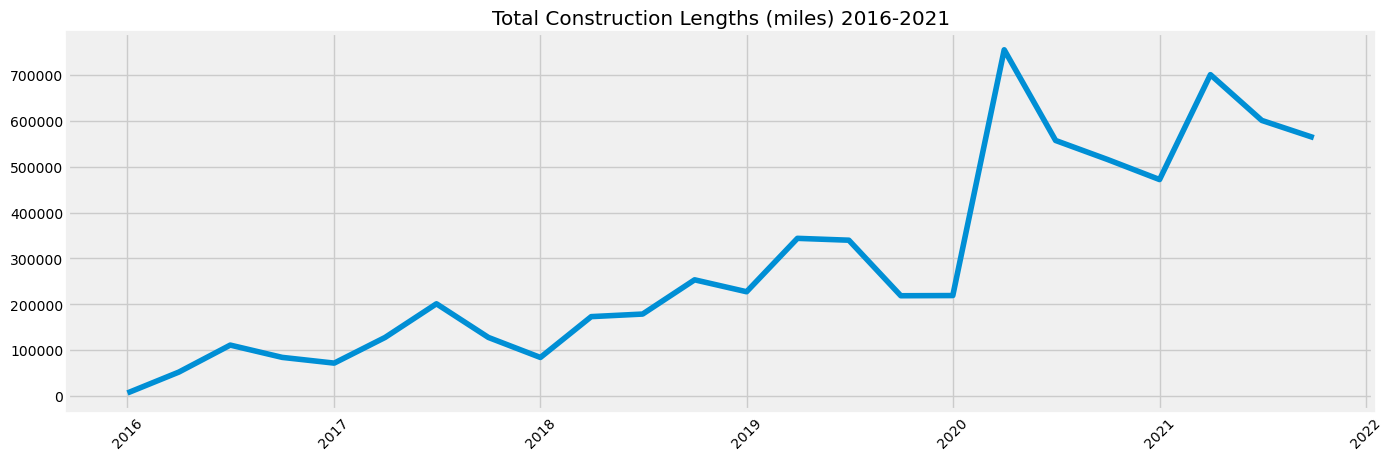

In [32]:
#plot total construction distance
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_ts4)
plt.xticks(rotation = 45)
plt.title('Total Construction Lengths (miles) 2016-2021')

In [61]:
df_ts4.isnull().sum()
#no dups

Distance(mi)    0
dtype: int64

In [62]:
dups = df.duplicated()
dups.sum()
#whole df has no duplicates

0

In [63]:
dups2 = df_ts4.duplicated()
dups2.sum()
#subset df_ts4 has no duplicates either

0

# 03 time series analysis: decomposition

In [64]:
#decompose the time series using an additive model since the plot seems linear (positive) trend
decomposition = sm.tsa.seasonal_decompose(df_ts4, model = 'additive')

In [65]:
#this defines a fixed size for all special charts

from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

<function matplotlib.pyplot.show(close=None, block=None)>

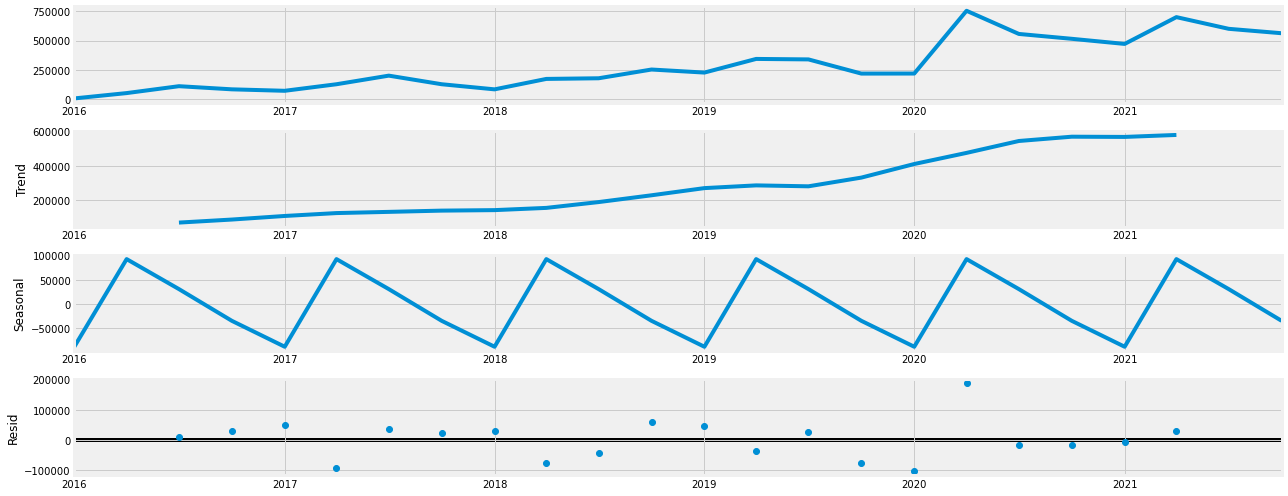

In [51]:
#plot separate components
decomposition.plot()
plt.show

The first plot shows the original line chart of the total construction in miles from 2016-2021 represented quarterly.
The second plot is the overall trend of the data, which is increasing. (implying that since there is an increasing trend and seasonality, this is a non-stationary time series).
The third plot shows the seasonality of the data that occurs each year. In this case, it seems as though for the first quarter, construction distances increase in the 2nd quarter and fall for the remainder of the year. The first quarter seems to be the least construction.
The last plot is the "noise" or "residual". The points that are not on the line represent values that are not explained by the trend and the seasonality.

# 04 testing for stationarity

In [52]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): #this defines this function
    print ('Dickey-Fuller Stationarity test:')
    #this 'adfuller' performs the dickey-fuller test:
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_ts4['Distance(mi)'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.776708
p-value                         0.991251
Number of Lags Used             8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


The Dickey-Fuller test checks for the presence of a unit root (a random jump that cannot be explained by variation in the data).
The null hypothesis is that there is a unit root (a random jump that cannot be explained by variation in the data).
The alternate hypothesis is that there is no unit root.
Since the test statistic is larger than all critical values, I cannot reject the null hypothesis, so there is a unit root in this data and this data is non-stationary.
Further, the p-value that is acceptable is less than .05 to be able to say that the probability of observing the test statistic is probable, and this is clearly not even close at 0.99.

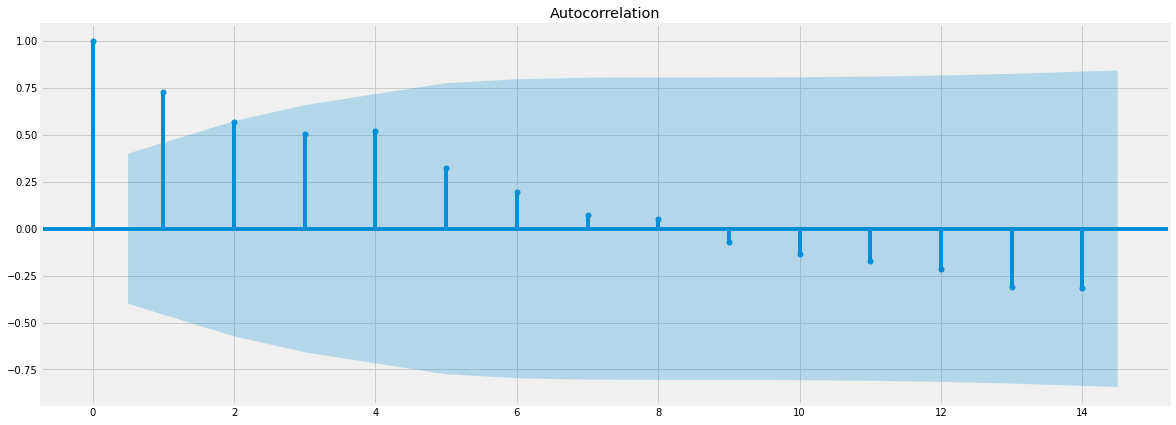

In [53]:
#plot of auto-correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_ts4)
plt.show()

# 05 stationarizing the US Construction data

In [54]:
data_diff = df_ts4 - df_ts4.shift(1)

In [55]:
#removing the missing values that came about as a result of the differencing
#these must be removed or I cannot run dickey-fuller test
data_diff.dropna(inplace = True)


In [56]:
data_diff.head()

,Distance(mi)
quarter,
2016-04-01,45533.929152
2016-07-01,58852.428081
2016-10-01,-26794.378517
2017-01-01,-12498.235153
2017-04-01,55918.512625


In [57]:
data_diff.columns

Index(['Distance(mi)'], dtype='object')

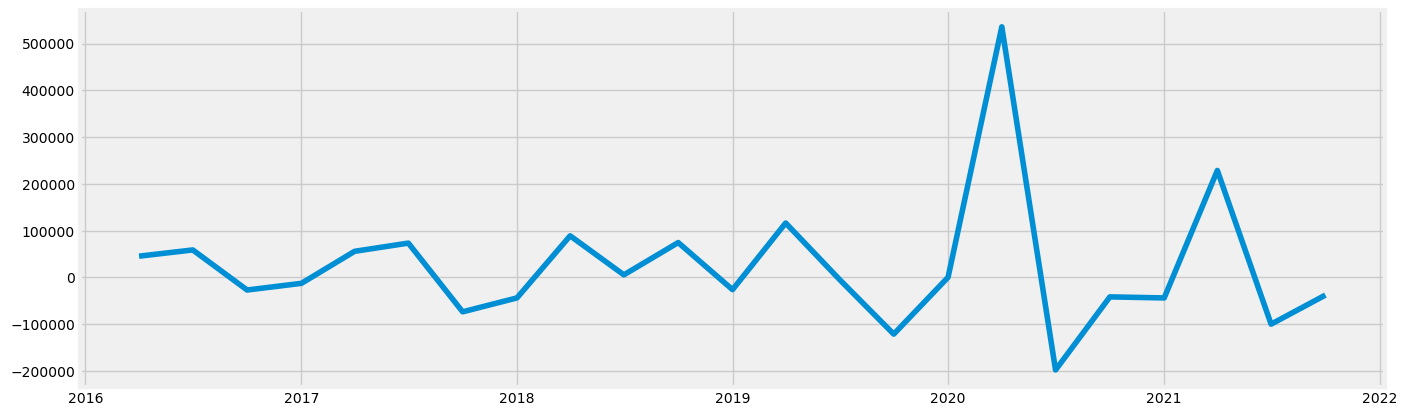

In [58]:
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.670626
p-value                         0.854212
Number of Lags Used             9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


The null hypothesis is that there is a unit root (a random jump that cannot be explained by variation in the data).
The alternate hypothesis is that there is no unit root.
Since the test statistic is larger than all critical values, I still cannot reject the null hypothesis, so there is a unit root in this data and this data is non-stationary. The p-value is better than 0.99, but is still dismal at 0.85 to say that this statistic is representative of this data. (P-value should be < 0.05).

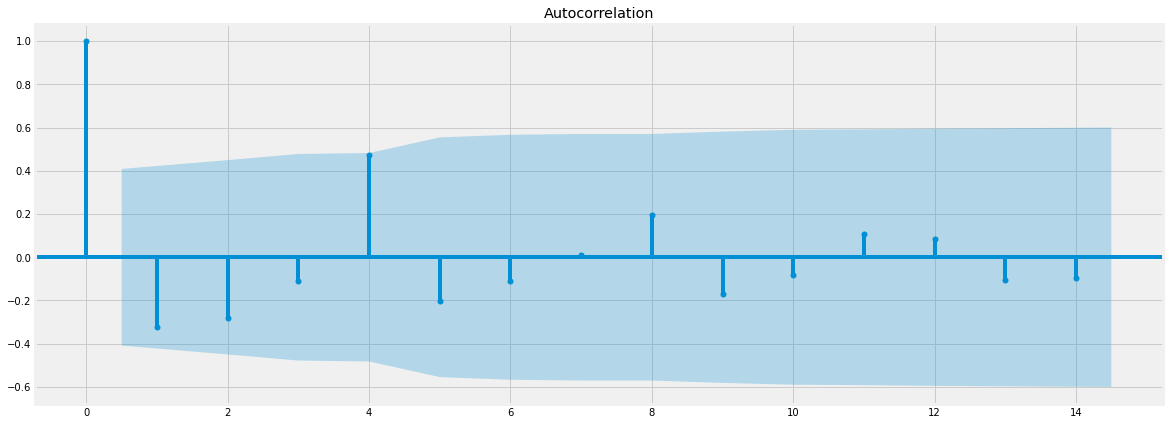

In [60]:
plot_acf(data_diff)
plt.show()

In [66]:
#data differencing again
data_diff2 = data_diff - data_diff.shift(1)

In [67]:
#removing the missing values that came about as a result of the differencing
#these must be removed or I cannot run dickey-fuller test
data_diff2.dropna(inplace = True)

In [69]:
data_diff2.head()

,Distance(mi)
quarter,
2016-07-01,13318.498929
2016-10-01,-85646.806598
2017-01-01,14296.143364
2017-04-01,68416.747778
2017-07-01,17533.372230


In [70]:
data_diff2.columns

Index(['Distance(mi)'], dtype='object')

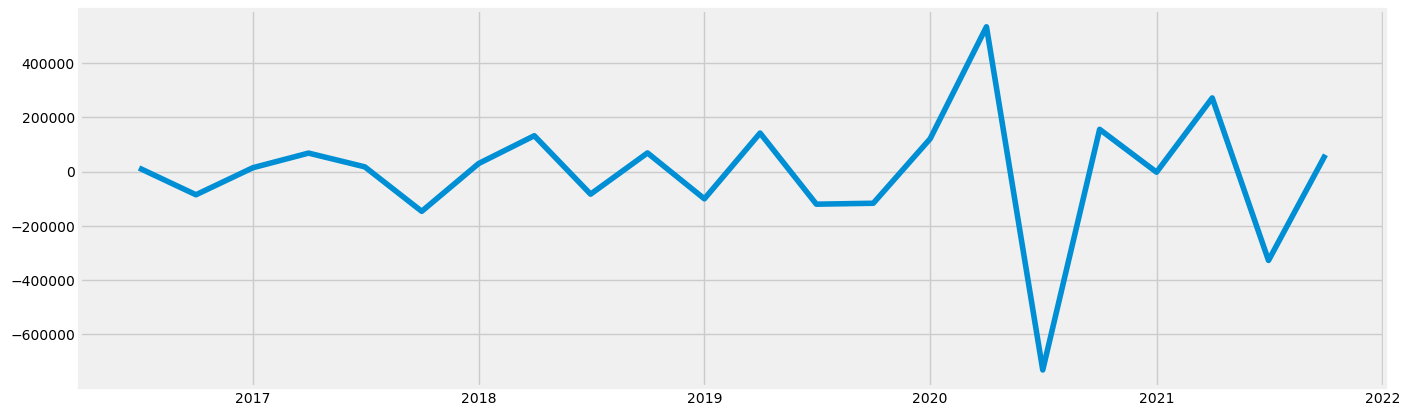

In [72]:
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_diff2)

In [73]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                  0.697571
p-value                         0.989789
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The null hypothesis is that there is a unit root (a random jump that cannot be explained by variation in the data).
The alternate hypothesis is that there is no unit root.
Since the test statistic is still larger than all critical values, I still cannot reject the null hypothesis, so there is a unit root in this data and this data is non-stationary.The p-value is back up to 0.98, so is again, the statistic is unrepresentative of this dataset.

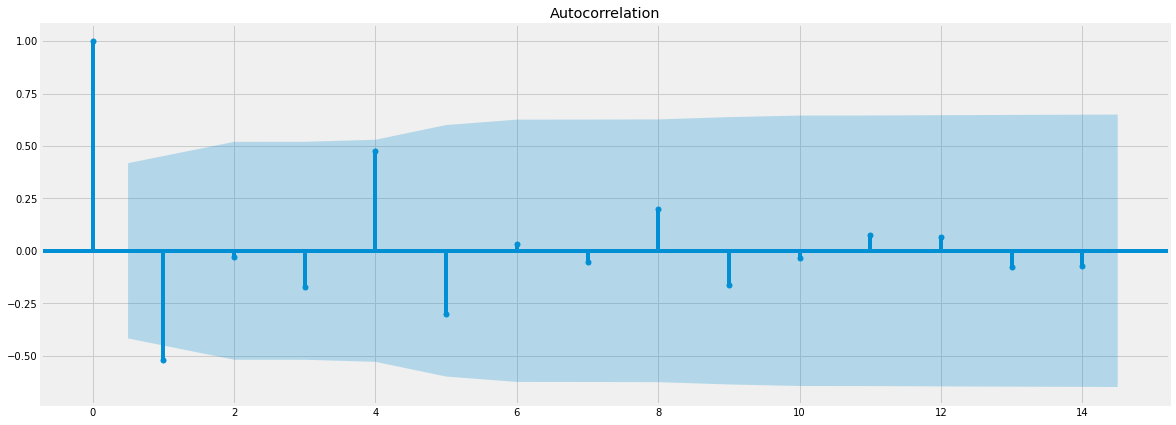

In [74]:
plot_acf(data_diff2)
plt.show()